# Lib

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

# Importing Data

In [150]:
df =pd.read_csv("stock_market.csv",na_values =["null"])
df = pri_df.dropna()
p_df =pd.DataFrame()
f_datax=pd.DataFrame()
f_datay=pd.DataFrame()

ytest = pd.DataFrame()
xtext = pd.DataFrame()
Xtrain = pd.DataFrame()
ytrain = pd.DataFrame()


In [151]:
df.head(5)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,ADANIPORTS,5/6/2008,150.000000,153.570007,147.820007,151.149994,134.313477,1782030.0
1,ADANIPORTS,5/7/2008,152.000000,154.460007,150.240005,153.309998,136.232864,1180015.0
2,ADANIPORTS,5/8/2008,152.199997,156.759995,150.199997,155.889999,138.525497,1856245.0
3,ADANIPORTS,5/9/2008,155.000000,160.600006,154.210007,156.520004,139.085312,3251375.0
4,ADANIPORTS,5/12/2008,156.000000,163.479996,151.000000,162.500000,144.399170,5031635.0


# Get objective Data

In [152]:
def o_data(p_symbol,p_feature):
    p_df =df[df.Symbol==p_symbol]
    p_df.drop(columns=['Symbol'],inplace=True)
    p_df.drop(columns=['Date'],inplace=True)
    p_df["obj"] = p_df[p_feature].shift(-1)
    
    sns.heatmap(p_df.isnull(),yticklabels=False)
    
    return p_df


ADANIPORTS


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Open,High,Low,Close,Adj Close,Volume,obj
0,150.000000,153.570007,147.820007,151.149994,134.313477,1782030.0,154.460007
1,152.000000,154.460007,150.240005,153.309998,136.232864,1180015.0,156.759995
2,152.199997,156.759995,150.199997,155.889999,138.525497,1856245.0,160.600006
3,155.000000,160.600006,154.210007,156.520004,139.085312,3251375.0,163.479996
4,156.000000,163.479996,151.000000,162.500000,144.399170,5031635.0,165.410004


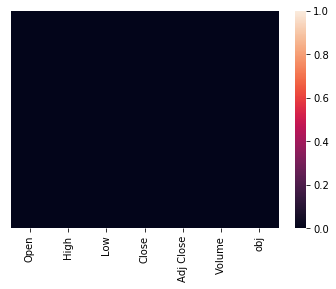

In [153]:
f_df = o_data("ADANIPORTS","High")
print("ADANIPORTS")
f_df.head(5)


# split Data

In [154]:
def slpit(adf,p_feature):
    train = adf[:2200]
    ftest = adf[2200:]
    test = ftest.dropna()

    Xtrain = train.loc[:, 'Open':'Volume']
    ytrain = train.loc[:,"obj"]
    xtest = test.loc[:, 'Open':'Volume']
    ytest = test.loc[:,"obj"]
    
    '''f_datay = f_df["obj"]
    f_datax = f_df.drop(columns=['obj'])
    Xtrain = f_datax[:2200]
    ytrain = f_datay[:2200]
    xtest = f_datax[2200:]
    ytest = f_datay[2200:]'''
    return Xtrain,ytrain,xtest,ytest



# Model

In [155]:
x_train,y_train,x_test,y_test = slpit(f_df,"obj")
y_train.head(5)
np.where(np.isnan(x_train))
#x_train.fillna(x_train.mean(), inplace=True)
#y_test.fillna(y_train.mean(), inplace=True)

#sns.heatmap,yticklabels=False)

(array([], dtype=int64), array([], dtype=int64))

In [156]:
from sklearn import linear_model

model = linear_model.LinearRegression()


# Train the model

In [157]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Test The model

In [158]:
p = model.predict(x_test)

In [165]:
print(model.score(x_test,y_test))
ffy_test= y_test.reset_index()
f_ytest = ffy_test.drop(columns=['index'])
f_ytest.head(5)

0.9706214929777179


,obj
0,327.500000
1,333.000000
2,335.799988
3,334.299988
4,332.950012


No handles with labels found to put in legend.


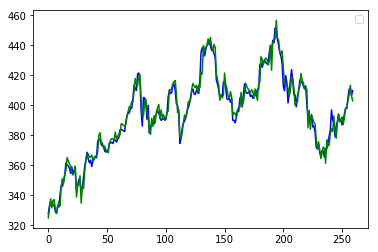

In [166]:
plt.plot(f_ytest,color='B')
plt.plot(p,color = 'G')
plt.legend()